In [1]:
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")
import intake
import sectionate
import xarray as xr
import numpy as np
import matplotlib.pylab as plt

In [3]:
cat_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"
col = intake.open_esm_datastore(cat_url)

In [4]:
dog = col.search(source_id='GFDL-CM4', experiment_id='historical', variable_id=['uo','vo','tos'])
#variable_id: uo=eastward_sea_water_velocity, vo=northward_sea_water_velocity, wo=upward_sea_water_velocity
dog.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,NOAA-GFDL,GFDL-CM4,historical,r1i1p1f1,Oday,tos,gn,gs://cmip6/CMIP/NOAA-GFDL/GFDL-CM4/historical/...,NaN,20180701
1,CMIP,NOAA-GFDL,GFDL-CM4,historical,r1i1p1f1,Oday,tos,gr,gs://cmip6/CMIP/NOAA-GFDL/GFDL-CM4/historical/...,NaN,20180701
2,CMIP,NOAA-GFDL,GFDL-CM4,historical,r1i1p1f1,Omon,tos,gn,gs://cmip6/CMIP/NOAA-GFDL/GFDL-CM4/historical/...,NaN,20180701
3,CMIP,NOAA-GFDL,GFDL-CM4,historical,r1i1p1f1,Omon,tos,gr,gs://cmip6/CMIP/NOAA-GFDL/GFDL-CM4/historical/...,NaN,20180701
4,CMIP,NOAA-GFDL,GFDL-CM4,historical,r1i1p1f1,Omon,uo,gn,gs://cmip6/CMIP/NOAA-GFDL/GFDL-CM4/historical/...,NaN,20180701
5,CMIP,NOAA-GFDL,GFDL-CM4,historical,r1i1p1f1,Omon,vo,gn,gs://cmip6/CMIP/NOAA-GFDL/GFDL-CM4/historical/...,NaN,20180701


In [6]:
dset_dict = dog.to_dataset_dict(zarr_kwargs={'consolidated': True})
list(dset_dict.keys())


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


['CMIP.NOAA-GFDL.GFDL-CM4.historical.Oday.gr',
 'CMIP.NOAA-GFDL.GFDL-CM4.historical.Omon.gr',
 'CMIP.NOAA-GFDL.GFDL-CM4.historical.Oday.gn',
 'CMIP.NOAA-GFDL.GFDL-CM4.historical.Omon.gn']

* Renamed what I usually call CM4_hist, grid

In [8]:
grid = dset_dict['CMIP.NOAA-GFDL.GFDL-CM4.historical.Omon.gn']
grid

<xarray.Dataset>
Dimensions:    (bnds: 2, lev: 35, member_id: 1, time: 1980, vertex: 4, x: 1440, y: 1080)
Coordinates:
    lat_bnds   (y, x, vertex) float32 dask.array<chunksize=(1080, 1440, 4), meta=np.ndarray>
    lon        (y, x) float32 dask.array<chunksize=(1080, 1440), meta=np.ndarray>
    time_bnds  (time, bnds) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
    lon_bnds   (y, x, vertex) float32 dask.array<chunksize=(1080, 1440, 4), meta=np.ndarray>
    lat        (y, x) float32 dask.array<chunksize=(1080, 1440), meta=np.ndarray>
  * time       (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
  * x          (x) float64 -299.7 -299.5 -299.2 -299.0 ... 59.53 59.78 60.03
  * bnds       (bnds) float64 1.0 2.0
  * y          (y) float64 -80.39 -80.31 -80.23 -80.15 ... 89.73 89.84 89.95
  * member_id  (member_id) <U8 'r1i1p1f1'
    lev_bnds   (lev, bnds) float64 dask.array<chunksize=(35, 2), meta=np.ndarray>
  * lev        (lev) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
Dimensions without coordinates: vertex
Data variables:
    tos        (member_id, time, y, x) float32 dask.array<chunksize=(1, 12, 1080, 1440), meta=np.ndarray>
    uo         (member_id, time, lev, y, x) float32 dask.array<chunksize=(1, 1, 35, 1080, 1440), meta=np.ndarray>
    vo         (member_id, time, lev, y, x) float32 dask.array<chunksize=(1, 1, 35, 1080, 1440), meta=np.ndarray>
Attributes:
    data_specs_version:      01.00.27
    parent_variant_label:    r1i1p1f1
    history:                 File was processed by fremetar (GFDL analog of C...
    branch_time_in_child:    0.0
    activity_id:             CMIP
    variable_id:             vo
    source_type:             AOGCM
    institution:             National Oceanic and Atmospheric Administration,...
    initialization_index:    1
    frequency:               mon
    comment:                 <null ref>
    Conventions:             CF-1.7 CMIP-6.0 UGRID-1.0
    title:                   NOAA GFDL GFDL-CM4 model output prepared for CMI...
    references:              see further_info_url attribute
    mip_era:                 CMIP6
    contact:                 gfdl.climate.model.info@noaa.gov
    realization_index:       1
    realm:                   ocean
    nominal_resolution:      25 km
    experiment:              historical
    variant_label:           r1i1p1f1
    sub_experiment:          none
    table_id:                Omon
    parent_activity_id:      CMIP
    physics_index:           1
    status:                  2019-08-06;created;by nhn2@columbia.edu
    forcing_index:           1
    parent_experiment_id:    piControl
    source_id:               GFDL-CM4
    branch_method:           standard
    parent_time_units:       days since 0001-1-1
    grid:                    ocean data on native grid tripolar - nominal 0.2...
    intake_esm_varname:      vo
    further_info_url:        https://furtherinfo.es-doc.org/CMIP6.NOAA-GFDL.G...
    tracking_id:             hdl:21.14100/9f878dc5-1ff9-4ef2-8f78-6c05e825259...
    institution_id:          NOAA-GFDL
    grid_label:              gn
    license:                 CMIP6 model data produced by NOAA-GFDL is licens...
    sub_experiment_id:       none
    parent_mip_era:          CMIP6
    experiment_id:           historical
    source:                  GFDL-CM4 (2018): \naerosol: interactive\natmos: ...
    branch_time_in_parent:   36500.0
    product:                 model-output
    parent_source_id:        GFDL-CM4
    variant_info:            N/A
    creation_date:           2019-02-24T07:42:16Z
    external_variables:      areacello
    intake_esm_dataset_key:  CMIP.NOAA-GFDL.GFDL-CM4.historical.Omon.gn

In [9]:
lat1= -4.495381
lon1= -208.21236
lat2= -5.989064
lon2= -205.234668

## Western part

In [10]:
from dask.distributed import Client
from dask_gateway import Gateway


gateway = Gateway()  # connect to Gateway

cluster = gateway.new_cluster()  # create cluster
cluster.scale(10)  # scale cluster

client = Client(cluster)  # connect Client to Cluster

In [11]:
client

Client Scheduler: gateway://traefik-gcp-uscentral1b-prod-dask-gateway.prod:80/prod.46e33cb1ae9343488f9de219e59294c2 Dashboard: https://us-central1-b.gcp.pangeo.io/services/dask-gateway/clusters/prod.46e33cb1ae9343488f9de219e59294c2/status,Cluster Workers: 0 Cores: 0 Memory: 0 B


In [13]:
isec, jsec, xsec, ysec = sectionate.create_section(grid['lon'], grid['lat'], lon1, lat1, lon2, lat2)

best fit is rounding down


The grid cell indices are then ready to be used to compute the section.

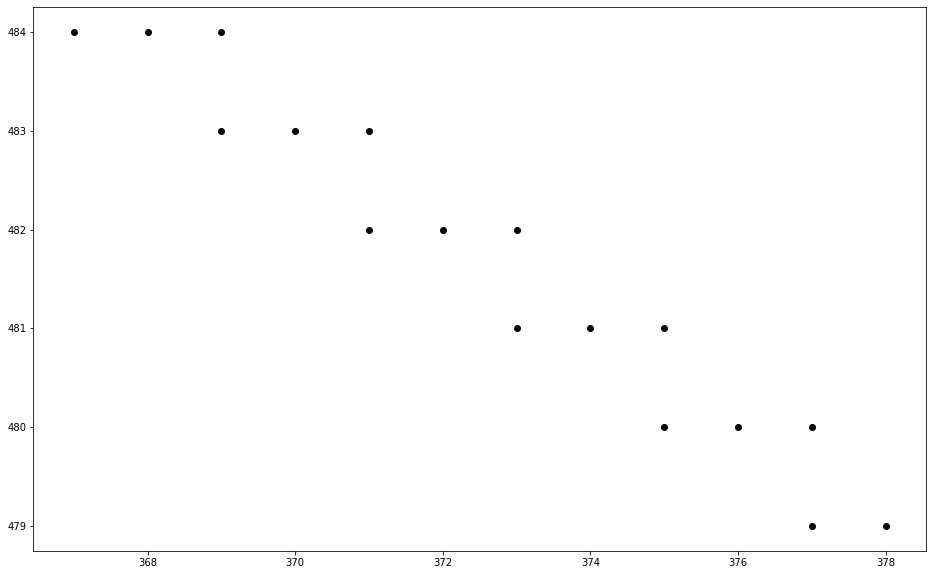

In [14]:
# double check for missing points
plt.figure(figsize=[16,10])
plt.plot(isec, jsec, 'ko')

In [21]:
jsec

array([484, 484, 484, 483, 483, 483, 482, 482, 482, 481, 481, 481, 480,
       480, 480, 479, 479], dtype=int32)

Print the i,j and associated lon/lat:

In [18]:
uvpoints = sectionate.transports_C.MOM6_UVpoints_from_section(isec, jsec)

for point in uvpoints:
    print(point)
    pttype, i, j = point
    i = int(i)
    j = int(j)
    if pttype == 'U':
        lon = grid['lon'].isel(x=i, y=j).values
        lat = grid['lat'].isel(x=i, y=j).values
    elif pttype == 'V':
        lon = grid['lon'].isel(x=i, y=j).values
        lat = grid['lat'].isel(x=i, y=j).values
    print(f'{point[0]}, {point[1]}, {point[2]}, {lon}, {lat}')

('V', 368, 484)
V, 368, 484, -207.875, -4.744568347930908
('V', 369, 484)
V, 369, 484, -207.625, -4.744568347930908
('U', 369, 484)
U, 369, 484, -207.625, -4.744568347930908
('V', 370, 483)
V, 370, 483, -207.375, -4.99366569519043
('V', 371, 483)
V, 371, 483, -207.125, -4.99366569519043
('U', 371, 483)
U, 371, 483, -207.125, -4.99366569519043
('V', 372, 482)
V, 372, 482, -206.875, -5.242669105529785
('V', 373, 482)
V, 373, 482, -206.625, -5.242669105529785
('U', 373, 482)
U, 373, 482, -206.625, -5.242669105529785
('V', 374, 481)
V, 374, 481, -206.375, -5.491572856903076
('V', 375, 481)
V, 375, 481, -206.125, -5.491572856903076
('U', 375, 481)
U, 375, 481, -206.125, -5.491572856903076
('V', 376, 480)
V, 376, 480, -205.875, -5.740372657775879
('V', 377, 480)
V, 377, 480, -205.625, -5.740372657775879
('U', 377, 480)
U, 377, 480, -205.625, -5.740372657775879
('V', 378, 479)
V, 378, 479, -205.375, -5.989063739776611


In [16]:
client.close()
cluster.close()